<a href="https://colab.research.google.com/github/sllpwlkr/Frameworks_7sem_Lupanova/blob/main/PSFII_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №3: Решающее дерево

## Задача классификации

### 2. Создание бейзлайна и оценка качества

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Загрузка данных
df = pd.read_csv('apple_quality.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
#Предобработка данных
print(df.head(1))
print(df.describe())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336    5.34633    -1.012009     1.8449   0.32984   

        Acidity Quality  
0  -0.491590483    good  
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.8

In [6]:
#Проверяем общее количество пропусков
total_missing = df.isnull().sum().sum()
print(f"Всего пропущенных значенийй: {total_missing}")

#Удаление строк с пропущенными значениями
initial_rows = len(df)
df_clean = df.dropna()
rows_after_cleaning = len(df_clean)
rows_removed = initial_rows - rows_after_cleaning

print(f"\nКоличество строк до удаления пропусков: {initial_rows}")
print(f"Удалено строк с пропущенными значениями: {rows_removed}")

#Сохраняем очищенный df
df = df_clean.copy()

Всего пропущенных значенийй: 8

Количество строк до удаления пропусков: 4001
Удалено строк с пропущенными значениями: 1


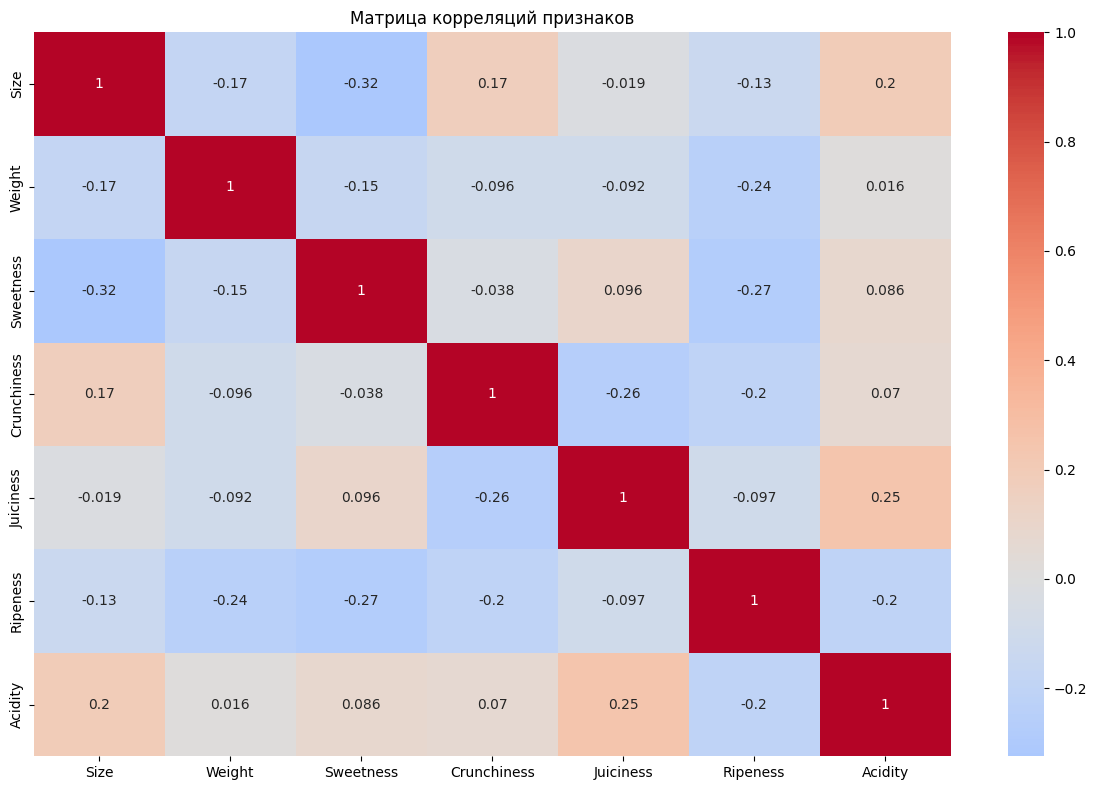

In [ ]:
#Матрица корреляций
plt.figure(figsize=(12, 8))
numeric_df = df.drop(['A_id', 'Quality'], axis=1)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций признаков')
plt.tight_layout()
plt.show()

In [ ]:
#Проверим баланс классов
print(df['Quality'].value_counts())

Quality
good    2004
bad     1996
Name: count, dtype: int64


In [ ]:
#Преобразуем целевую переменную из категориального в чиловой признак
le = LabelEncoder()
df['Quality_encoded'] = le.fit_transform(df['Quality'])
print(f"\nКодирование классов: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Кодирование классов: {'bad': np.int64(0), 'good': np.int64(1)}


In [ ]:
#Удаляем колонку с id и разделяем датасет на фичи и целевую переменную
X = df.drop(['A_id', 'Quality', 'Quality_encoded'], axis=1)
y = df['Quality_encoded']

In [ ]:
#Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#Бейзлайн модель и предсказания
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)


DecisionTree Baseline:
Accuracy: 0.7975
Precision: 0.7986
Recall: 0.7975
F1-score: 0.7973


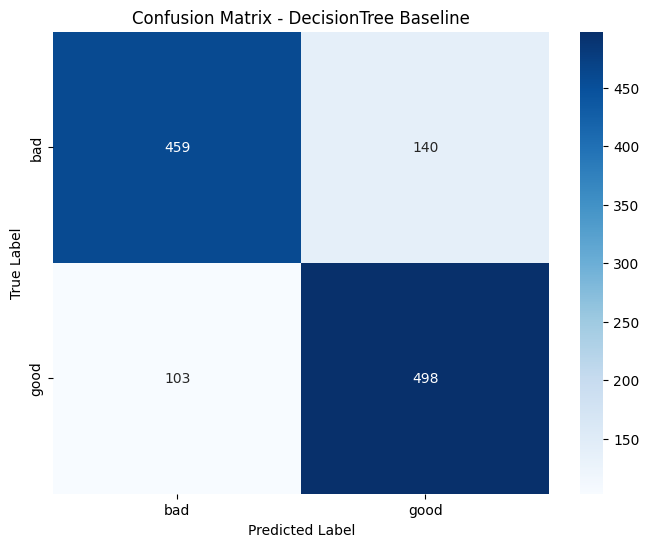

In [ ]:
#Оценка качества
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
base_metrics = evaluate_model(y_test, y_pred, "DecisionTree Baseline")

### 3. Улучшение бейзлайна

Гипотеза 1: масштабирование признаков

Гипотеза 2: подбор гиперпараметров модели

Гипотеза 3: создание новых полиномиальных признаков


In [ ]:
#Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Модель с масштабированными признаками
model_scaled = DecisionTreeClassifier()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

In [ ]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_scaled):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_scaled):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_scaled):.4f}")

Accuracy: 0.8033
Precision: 0.7847
Recall: 0.8369
F1-score: 0.8100


После масштабирования данных модель стала хуже предсказывать положительный класс (bad apple)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
print(f"\nРазмерность данных до полиномиального преобразования: {X_train.shape}")
print(f"Размерность данных после полиномиального преобразования: {X_train_poly.shape}")


Размерность данных до полиномиального преобразования: (2800, 7)
Размерность данных после полиномиального преобразования: (2800, 35)


In [ ]:
#Модель с полиномиальными признаками
model_new_features = DecisionTreeClassifier()
model_new_features.fit(X_train_poly, y_train)
y_pred_new_features = model_new_features.predict(X_test_poly)

In [ ]:
#Оценка метрик
print(f"Accuracy: {accuracy_score(y_test, y_pred_new_features):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_new_features):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_new_features):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_new_features):.4f}")

Accuracy: 0.7925
Precision: 0.7904
Recall: 0.7970
F1-score: 0.7937


Добавление полиномиальных признаков не привело к улучшению модели по сравнению с baseline. Новые признаки не несут дополнительной полезной информации.

In [ ]:
#Подбор гиперпараметров с кросс-валидацией
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='f1', verbose=1)

In [ ]:
print("\nЛучшие параметры:", grid_search.best_params_)
print(f"Лучший F1-score на кросс-валидации: {grid_search.best_score_:.4f}")


Лучшие параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 2}
Лучший F1-score на кросс-валидации: 0.8135



DecisionTree impoved:
Accuracy: 0.8050
Precision: 0.8051
Recall: 0.8050
F1-score: 0.8050


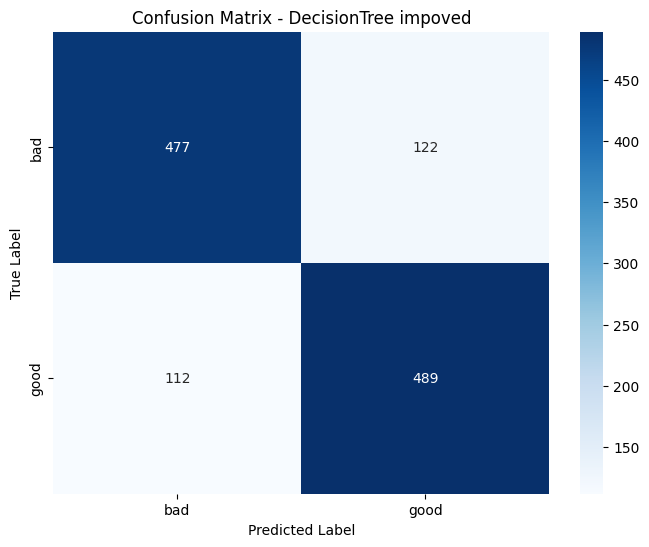

In [ ]:
#Модель с гипер параметрами
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


improved_metrics = evaluate_model(y_test, y_pred_best,"DecisionTree impoved")

In [ ]:
#Сравнение базовой и улучшенной моделей
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Base Model': [
        base_metrics['accuracy'],
        base_metrics['precision'],
        base_metrics['recall'],
        base_metrics['f1']
    ],
    'Improved Model': [
        improved_metrics['accuracy'],
        improved_metrics['precision'],
        improved_metrics['recall'],
        improved_metrics['f1']
    ]
})
print(comparison)

      Metric  Base Model  Improved Model
0   Accuracy    0.797500        0.805000
1  Precision    0.798615        0.805079
2     Recall    0.797500        0.805000
3   F1-Score    0.797297        0.804984


Улучшенная модель стабильно превосходит базовую по всем метрикам примерно на 1%

### 4.	Имплементация алгоритма машинного обучения

In [ ]:
#Кастомная реализация решающего дерева для классификации
class CustomDecisionTree:

    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion = 'gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.tree = None
        self.feature_importances_ = None

    #Вычисление коэффициента Джини
    def _gini(self, y):

        if len(y) == 0:
            return 0
        p = np.sum(y) / len(y)
        return 1 - p**2 - (1-p)**2

    #Вычисление энтропии
    def _entropy(self, y):
        if len(y) == 0:
            return 0
        p = np.sum(y) / len(y)
        if p == 0 or p == 1:
            return 0
        return -p * np.log2(p) - (1-p) * np.log2(1-p)

    def _information_gain(self, y, y_left, y_right):
            if self.criterion == 'gini':
                parent_impurity = self._gini(y)
                left_impurity = self._gini(y_left)
                right_impurity = self._gini(y_right)
            else:  # entropy
                parent_impurity = self._entropy(y)
                left_impurity = self._entropy(y_left)
                right_impurity = self._entropy(y_right)

            n = len(y)
            n_left = len(y_left)
            n_right = len(y_right)

            gain = parent_impurity - (n_left/n) * left_impurity - (n_right/n) * right_impurity
            return gain
    #Поиск наилучшего разделения
    def _find_best_split(self, X, y):
        best_gain = 0
        best_split = None

        n_samples, n_features = X.shape

        for feature_idx in range(n_features):
            #Уникальные значения признака
            feature_values = np.unique(X[:, feature_idx])

            for threshold in feature_values:
                #Разделение на левую и правую части
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
                    continue

                #Вычисление информационного выигрыша
                gain = self._information_gain(y, y[left_mask], y[right_mask])

                if gain > best_gain:
                    best_gain = gain
                    best_split = {
                        'feature_idx': feature_idx,
                        'threshold': threshold,
                        'gain': gain
                    }

        return best_split
    #Рекурсивное построение дерева
    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)

        #Критерии остановки
        if (self.max_depth is not None and depth >= self.max_depth or
            n_samples < self.min_samples_split or
            len(np.unique(y)) == 1):

            #Листовой узел - возвращаем наиболее частый класс
            unique, counts = np.unique(y, return_counts=True)
            return {
                'is_leaf': True,
                'class': unique[np.argmax(counts)],
                'samples': n_samples
            }

        #Поиск наилучшего разделения
        split = self._find_best_split(X, y)

        if split is None or split['gain'] == 0:
            #Не удалось найти хорошее разделение
            unique, counts = np.unique(y, return_counts=True)
            return {
                'is_leaf': True,
                'class': unique[np.argmax(counts)],
                'samples': n_samples
            }

        #Разделение данных
        left_mask = X[:, split['feature_idx']] <= split['threshold']
        right_mask = ~left_mask

        #Рекурсивное построение левого и правого поддеревьев
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'is_leaf': False,
            'feature_idx': split['feature_idx'],
            'threshold': split['threshold'],
            'gain': split['gain'],
            'left': left_subtree,
            'right': right_subtree,
            'samples': n_samples
        }

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        self.tree = self._build_tree(X, y)

        #Вычисление важности признаков
        self._compute_feature_importance(X.shape[1])

        return self

    #Для предсказания одного образца
    def _predict_one(self, x, node):
        if node['is_leaf']:
            return node['class']

        if x[node['feature_idx']] <= node['threshold']:
            return self._predict_one(x, node['left'])
        else:
            return self._predict_one(x, node['right'])

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for i in range(len(X)):
            predictions.append(self._predict_one(X[i], self.tree))
        return np.array(predictions)

   #Вычисление важности признаков
    def _compute_feature_importance(self, n_features):
        importances = np.zeros(n_features)
        total_samples = self.tree['samples']

        def traverse(node):
            if not node['is_leaf']:
                #Важность признака пропорциональна выигрышу * доля образцов
                importances[node['feature_idx']] += node['gain'] * (node['samples'] / total_samples)
                traverse(node['left'])
                traverse(node['right'])

        traverse(self.tree)
        self.feature_importances_ = importances / np.sum(importances) if np.sum(importances) > 0 else importances

In [ ]:
#Обучение и предсказание кастомной модели
custom_tree = CustomDecisionTree()
custom_tree.fit(X_train, y_train)

y_pred_custom = custom_tree.predict(X_test)


DecisionTree Custom:
Accuracy: 0.7875
Precision: 0.7885
Recall: 0.7875
F1-score: 0.7873


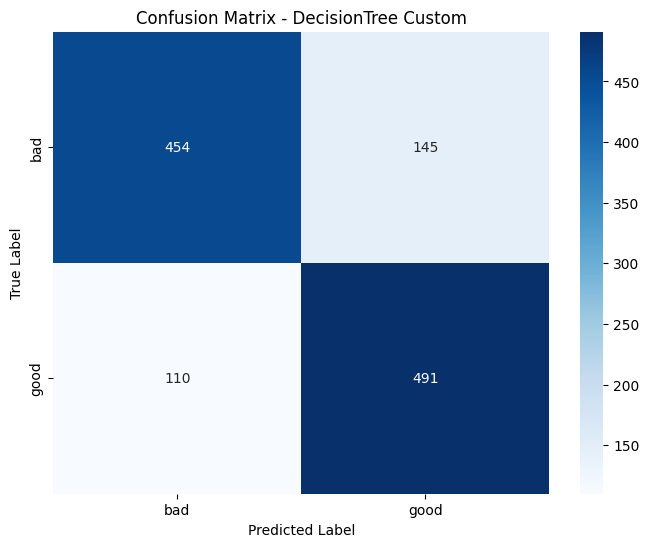

In [ ]:
#Оценка качества
custom_metrics = evaluate_model(y_test, y_pred_custom, "DecisionTree Custom")

In [ ]:
#Применяем лучшие гиперпараметры из GridSearch к кастомной модели
custom_improved_tree = CustomDecisionTree(criterion = 'gini', max_depth = 10, min_samples_leaf = 6, min_samples_split = 2 )
custom_improved_tree.fit(X_train, y_train)

y_pred_improved_custom= custom_improved_tree.predict(X_test)


DecisionTree Improved Custom:
Accuracy: 0.8000
Precision: 0.8001
Recall: 0.8000
F1-score: 0.8000


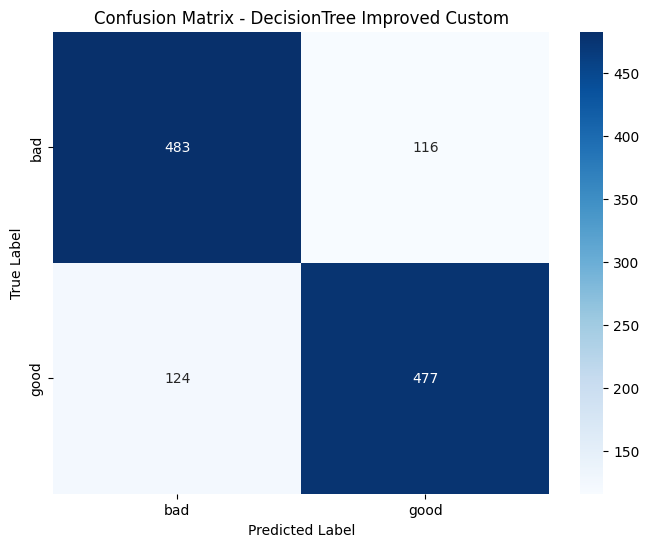

In [ ]:
#Оценка качества
custom_impoved_metrics = evaluate_model(y_test, y_pred_improved_custom, "DecisionTree Improved Custom")

In [ ]:
#Сравнение всех метрик всех моделей
comparison_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Baseline DecisionTree': [
        base_metrics['accuracy'],
        base_metrics['precision'],
        base_metrics['recall'],
        base_metrics['f1']
    ],
    'Improved DecisionTree': [
        improved_metrics['accuracy'],
        improved_metrics['precision'],
        improved_metrics['recall'],
        improved_metrics['f1']
    ],
    'Custom DecisionTree': [
        custom_metrics['accuracy'],
        custom_metrics['precision'],
        custom_metrics['recall'],
        custom_metrics['f1']
    ],
    'Custom Improved DecisionTree': [
        custom_impoved_metrics['accuracy'],
        custom_impoved_metrics['precision'],
        custom_impoved_metrics['recall'],
        custom_impoved_metrics['f1']
    ]
})

print(comparison_metrics.to_string(index=False))

   Metric  Baseline DecisionTree  Improved DecisionTree  Custom DecisionTree  Custom Improved DecisionTree
 Accuracy               0.797500               0.805000             0.787500                      0.800000
Precision               0.798615               0.805079             0.788461                      0.800058
   Recall               0.797500               0.805000             0.787500                      0.800000
 F1-score               0.797297               0.804984             0.787309                      0.799993


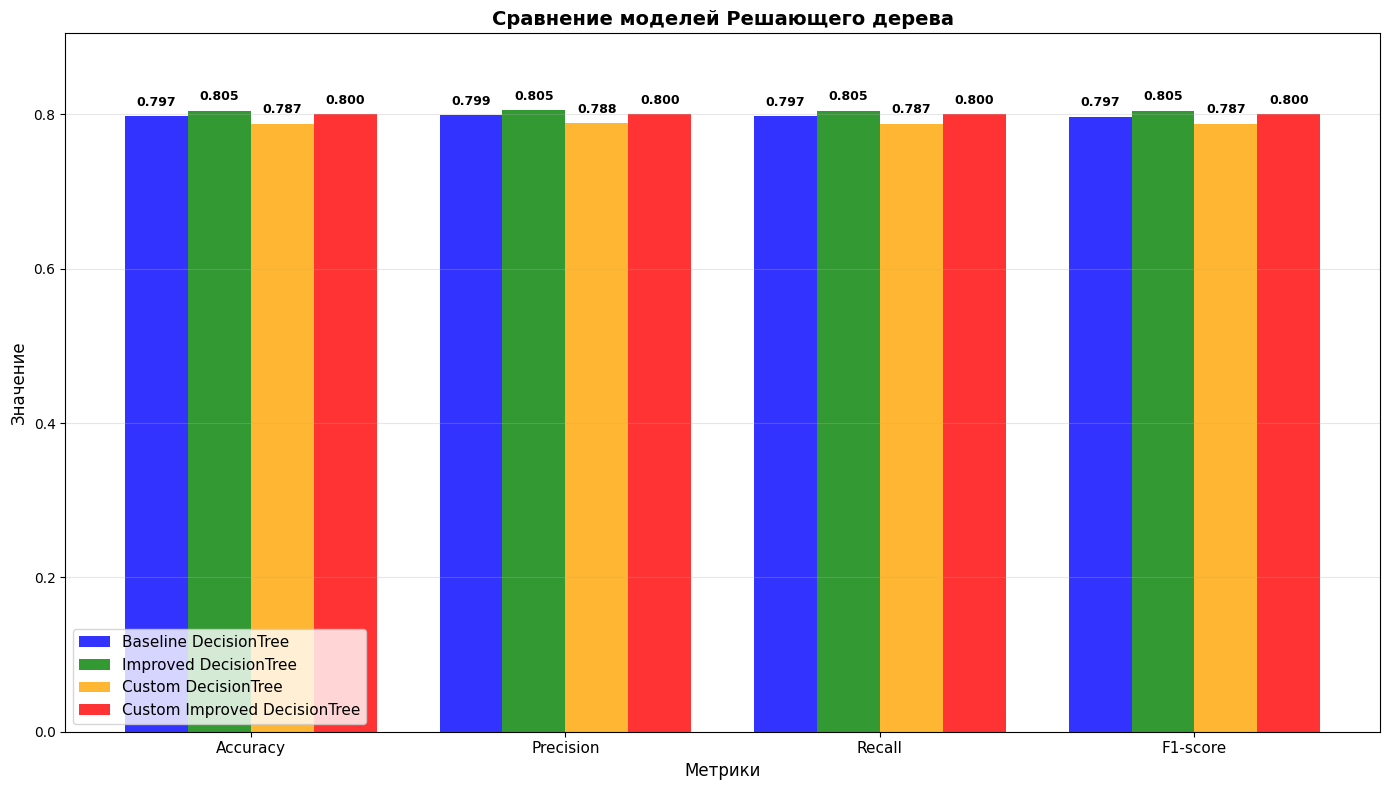

In [ ]:
#Визуализация сравнения
plt.figure(figsize=(14, 8))
x = np.arange(len(comparison_metrics))
width = 0.2

plt.bar(x - width*1.5, comparison_metrics['Baseline DecisionTree'], width,
        label='Baseline DecisionTree', alpha=0.8, color='blue')
plt.bar(x - width/2, comparison_metrics['Improved DecisionTree'], width,
        label='Improved DecisionTree', alpha=0.8, color='green')
plt.bar(x + width/2, comparison_metrics['Custom DecisionTree'], width,
        label='Custom DecisionTree', alpha=0.8, color='orange')
plt.bar(x + width*1.5, comparison_metrics['Custom Improved DecisionTree'], width,
        label='Custom Improved DecisionTree', alpha=0.8, color='red')

plt.xlabel('Метрики', fontsize=12)
plt.ylabel('Значение', fontsize=12)
plt.title('Сравнение моделей Решающего дерева', fontsize=14, fontweight='bold')
plt.xticks(x, comparison_metrics['Metric'], fontsize=11)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)

#Добавляем значения над столбцами
for i in range(len(comparison_metrics)):
    plt.text(i - width*1.5, comparison_metrics['Baseline DecisionTree'][i] + 0.01,
             f'{comparison_metrics["Baseline DecisionTree"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i - width/2, comparison_metrics['Improved DecisionTree'][i] + 0.01,
             f'{comparison_metrics["Improved DecisionTree"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width/2, comparison_metrics['Custom DecisionTree'][i] + 0.01,
             f'{comparison_metrics["Custom DecisionTree"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    plt.text(i + width*1.5, comparison_metrics['Custom Improved DecisionTree'][i] + 0.01,
             f'{comparison_metrics["Custom Improved DecisionTree"][i]:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Настраиваем пределы оси Y
max_val = max([comparison_metrics['Baseline DecisionTree'].max(), comparison_metrics['Improved DecisionTree'].max(), comparison_metrics['Custom DecisionTree'].max(), comparison_metrics['Custom Improved DecisionTree'].max()]) + 0.1
plt.ylim(0, min(max_val, 1.0))

plt.tight_layout()
plt.show()

Custom Decision Tree в базовой версии отстает от библиотечных аналогов на 1-2%, но после оптимизации достигает уровня улучшенной библиотечной модели, демонстрируя корректность реализации.

Improved Decision Tree показала незначительное улучшения точности (80%) по сравнению с Baseline Decision Tree (79.7%).

## Задача регресии

### 2. Создание бейзлайна и оценка качества

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('pizza_dataset.csv')
df.head(5)

,id,date,time,name,size,type,price,diameter_cm,weight_g,calories_per_100g,...,cheese_percent,crust_type,sauce_type,filling_density,area_cm2,density_g_per_cm2,total_calories,cook_efficiency,ingredient_intensity,price_final
0,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,29.498160,457.825488,279.125963,...,30.701562,regular,tomato,regular,683.061055,0.670256,1277.909802,0.309009,13.105430,50.00
1,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,31.802857,481.340835,250.388400,...,16.691659,regular,tomato,regular,793.966056,0.606249,1205.221616,0.324397,6.232590,43.25
2,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00,30.927976,439.468001,222.409110,...,20.847359,regular,bbq,medium,750.883653,0.585268,977.416871,0.353923,11.377393,48.75
3,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,36.394634,559.697009,248.607456,...,23.454774,regular,spicy_asian,regular,1039.786963,0.538280,1391.448496,0.384982,8.933405,59.50
4,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50,34.624075,568.288698,219.772790,...,39.873953,regular,tomato,medium,941.078833,0.603869,1248.943927,0.205297,10.558014,54.25


In [ ]:
df.describe()

,price,diameter_cm,weight_g,calories_per_100g,ingredient_count,complexity_score,cook_time_min,ingredient_cost,popularity_score,spiciness,cheese_percent,area_cm2,density_g_per_cm2,total_calories,cook_efficiency,ingredient_intensity,price_final
count,40303.000000,40303.000000,40303.000000,40302.000000,40302.000000,40302.000000,40302.000000,40302.000000,40302.000000,40302.000000,40302.000000,40302.000000,40302.000000,40302.000000,40302.000000,40302.000000,40302.000000
mean,16.502990,30.704085,519.655392,280.041525,4.591509,4.709866,14.001594,10.674097,7.554505,1.639298,25.109289,761.111403,0.726460,1466.430673,0.337027,9.310629,49.372295
std,3.621695,5.179523,105.181488,41.442849,1.267795,1.585245,2.676365,2.132375,1.140922,0.846490,6.616973,248.725820,0.168900,411.360492,0.099535,3.612773,6.462744
min,9.750000,22.000270,223.241077,167.018611,3.000000,2.000000,5.025719,3.571696,3.215589,1.000000,15.000000,379.949326,0.362021,438.197968,0.109948,3.599621,28.250000
25%,12.750000,25.463609,441.573547,250.891906,4.000000,4.000000,12.119030,9.166655,6.743392,1.000000,19.925706,508.985518,0.601898,1168.571204,0.265005,6.697397,44.750000
50%,16.500000,30.663720,518.355916,280.107755,5.000000,5.000000,14.061854,10.628515,7.492408,1.000000,24.725156,738.110456,0.694735,1433.207070,0.333911,8.556973,49.250000
75%,20.250000,35.522629,595.860200,310.659228,5.000000,6.000000,15.890758,12.137148,8.316788,2.000000,29.677978,990.559103,0.828789,1724.972341,0.403464,11.185296,54.000000
max,35.950000,49.982993,853.363727,425.023101,8.000000,8.000000,24.361009,19.113031,10.000000,4.000000,50.000000,1961.165170,1.393794,3364.563092,0.869375,32.349101,72.250000


In [ ]:
#Идентификация категориальных признаков
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные признаки: {categorical_cols}")

#Изучим уникальные значения в каждом категориальном признаке
for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Уникальных значений: {unique_vals}")

Категориальные признаки: ['id', 'date', 'time', 'name', 'size', 'type', 'crust_type', 'sauce_type', 'filling_density']

id:
  Уникальных значений: 17407

date:
  Уникальных значений: 291

time:
  Уникальных значений: 14003

name:
  Уникальных значений: 32

size:
  Уникальных значений: 5

type:
  Уникальных значений: 4

crust_type:
  Уникальных значений: 5

sauce_type:
  Уникальных значений: 6

filling_density:
  Уникальных значений: 3


In [ ]:
#Обработка категориальных признаков
df_processed = df.copy()

#Удаляем исходные столбцы date, time и id
df_processed = df_processed.drop(['date', 'time', 'id'], axis=1)

#One-Hot для основных категориальных признаков
categorical_to_encode = ['size', 'type', 'crust_type', 'sauce_type', 'filling_density']

#Для name используем частотное кодирование, так как много уникальных значений
name_freq = df_processed['name'].value_counts(normalize=True)
df_processed['name_freq'] = df_processed['name'].map(name_freq)
df_processed = df_processed.drop('name', axis=1)

#One-Hot для остальных категориальных признаков
df_processed = pd.get_dummies(df_processed, columns=categorical_to_encode, drop_first=True)

print(f"Количество признаков после One-Hot Encoding: {df_processed.shape[1]}")

Количество признаков после One-Hot Encoding: 36


In [ ]:
#Обработка пропусков
missing_values = df_processed.isnull().sum()

if missing_values.sum() == 0:
    print("Пропусков в данных нет")
else:
    #Заполняем пропуски медианой для числовых и модой для категориальных
    for col in df_processed.columns:
        if df_processed[col].isnull().sum() > 0:
            if df_processed[col].dtype in ['int64', 'float64']:
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
            else:
                df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
    print("Пропуски обработаны")

Пропусков в данных нет


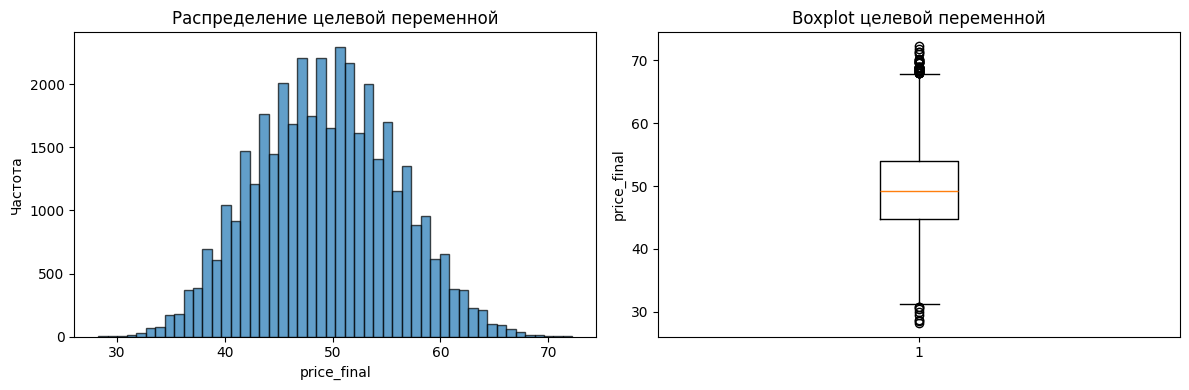

In [ ]:
#Разделение на признаки и целевую переменную
X = df_processed.drop('price_final', axis=1)
y = df_processed['price_final']

#Анализ целевой переменной
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(y, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('price_final')
plt.ylabel('Частота')
plt.title('Распределение целевой переменной')

plt.subplot(1, 2, 2)
plt.boxplot(y)
plt.ylabel('price_final')
plt.title('Boxplot целевой переменной')
plt.tight_layout()
plt.show()


In [ ]:
#Перевод bool во float
X = X.astype(np.float64)
y = y.astype(np.float64)

In [ ]:
#Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [ ]:
#Обучение бейзлайна и предсказания
base_model = DecisionTreeRegressor()
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)

In [ ]:
#Функция для вычисления метрик
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name}:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    return {'mae': mae, 'rmse': rmse, 'r2': r2}
    return mae, rmse, r2

In [ ]:
#Оценка бейзлайна
baseline_metrics = evaluate_model(y_test, y_pred, "Baseline DecisionTree")


Baseline DecisionTree:
MAE: 2.1808
RMSE: 2.7630
R² Score: 0.8165


### 3. Улучшение бейзлайна

Гипотеза 1: масштабирование данных

Гипотеза 2: удаление выбросов целевой переменной

Гипотеза 3: создание новых признаков

Гипотеза 4: отбор наиболее значимых признаков

Гипотеза 5: подбор гипер параметров модели


In [ ]:
#Масштабируем числовые признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем модель на масштабированных данных
model_scaled = DecisionTreeRegressor()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)
metrics_scaled = evaluate_model(y_test, y_pred_scaled, "С масштабированием")


С масштабированием:
MAE: 2.1837
RMSE: 2.7678
R² Score: 0.8158


Масштабирование признаков не повлияло на модель в лучшую сторону. Все метрики чуть-чуть ухудшились

In [ ]:
#Удаление выбросов в целевой переменной
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Фильтрация данных без выбросов
mask_no_outliers = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_no_outliers = X_train_scaled[mask_no_outliers]
y_train_no_outliers = y_train[mask_no_outliers]

print(f"Оригинальный размер обучающей выборки: {len(X_train)}")
print(f"Размер после удаления выбросов: {len(X_train_no_outliers)}")

Оригинальный размер обучающей выборки: 32242
Размер после удаления выбросов: 32204


In [ ]:
#Обучаем модель без выбросов
model_no_outliers = DecisionTreeRegressor()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

y_pred_no_outliers = model_no_outliers.predict(X_test_scaled)
metrics_no_outliers = evaluate_model(y_test, y_pred_no_outliers, "Без выбросов + масштабирование")


Без выбросов + масштабирование:
MAE: 2.1808
RMSE: 2.7652
R² Score: 0.8162


Удаление выбросов не нужно, так как оно не дало улучшения, а только усложнило пайплайн

In [ ]:
#Создаем копию данных для создания новых признаков
X_train_engineered = X_train.copy()
X_test_engineered = X_test.copy()

# оздание новых признаков
X_train_engineered['price_to_weight'] = X_train_engineered['price'] / (X_train_engineered['weight_g'] + 1)
X_train_engineered['calories_per_slice'] = X_train_engineered['total_calories'] / X_train_engineered['ingredient_count']
X_train_engineered['density_calories'] = X_train_engineered['density_g_per_cm2'] * X_train_engineered['calories_per_100g']

X_test_engineered['price_to_weight'] = X_test_engineered['price'] / (X_test_engineered['weight_g'] + 1)
X_test_engineered['calories_per_slice'] = X_test_engineered['total_calories'] / X_test_engineered['ingredient_count']
X_test_engineered['density_calories'] = X_test_engineered['density_g_per_cm2'] * X_test_engineered['calories_per_100g']

print(f"Количество признаков после добавления: {X_test_engineered.shape[1]}")

Количество признаков после добавления: 38


In [ ]:
model_engineered = DecisionTreeRegressor()
model_engineered.fit(X_train_engineered, y_train)
y_pred_engineered = model_engineered.predict(X_test_engineered)
engineered_metrics = evaluate_model(y_test, y_pred_engineered, "Создание признаков")


Создание признаков:
MAE: 2.1898
RMSE: 2.7712
R² Score: 0.8154


Создание новых признаков в данном случае не привело к существенному улучшению качества модели

In [ ]:
#Определяем оптимальное количество признаков с помощью кросс-валидации
k_values = [10,12, 14, 16, 18, 20, 22, 24, 26, 28, 30, X_train.shape[1]]
k_scores = []

for k in k_values:
    if k <= X_train.shape[1]:
        selector = SelectKBest(score_func=f_regression, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)

        #Обучаем модель на отобранных признаках
        model_k = DecisionTreeRegressor()
        score = cross_val_score(model_k, X_train_selected, y_train,
                               cv=5, scoring='r2').mean()
        k_scores.append(score)
        print(f"k={k}: R² = {score:.4f}")

#Определяем оптимальное k
optimal_k = k_values[np.argmax(k_scores)]
print(f"\nОптимальное количество признаков: {optimal_k} (R² = {max(k_scores):.4f})")

k=10: R² = 0.7898
k=12: R² = 0.8028
k=14: R² = 0.8107
k=16: R² = 0.8093
k=18: R² = 0.8094
k=20: R² = 0.8129
k=22: R² = 0.8132
k=24: R² = 0.8139
k=26: R² = 0.8137
k=28: R² = 0.8145
k=30: R² = 0.8140
k=35: R² = 0.8142

Оптимальное количество признаков: 28 (R² = 0.8145)


In [ ]:
#Применяем SelectKBest с оптимальным k
selector_kbest = SelectKBest(score_func=f_regression, k=optimal_k)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)
X_test_kbest = selector_kbest.transform(X_test)

#Обучаем модель на отобранных признаках
model_kbest = DecisionTreeRegressor()
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)

metrics_kbest = evaluate_model(y_test, y_pred_kbest, f"SelectKBest (k={optimal_k})")


SelectKBest (k=28):
MAE: 2.1809
RMSE: 2.7589
R² Score: 0.8170


Отбор более значимых признаков не дал прироста по метрикам

In [ ]:
#Используем кросс-валидацию для подбора параметров
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(DecisionTreeRegressor(),
                          param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1,
                          verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
print(f"Лучшие гиперпараметры: {grid_search.best_params_}")

Лучшие гиперпараметры: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 20}


In [ ]:
#Модель с лучшими параметрами
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
improved_metrics = evaluate_model(y_test, y_pred_best, "Подбор гиперпараметров")


Подбор гиперпараметров:
MAE: 1.7451
RMSE: 2.1913
R² Score: 0.8846


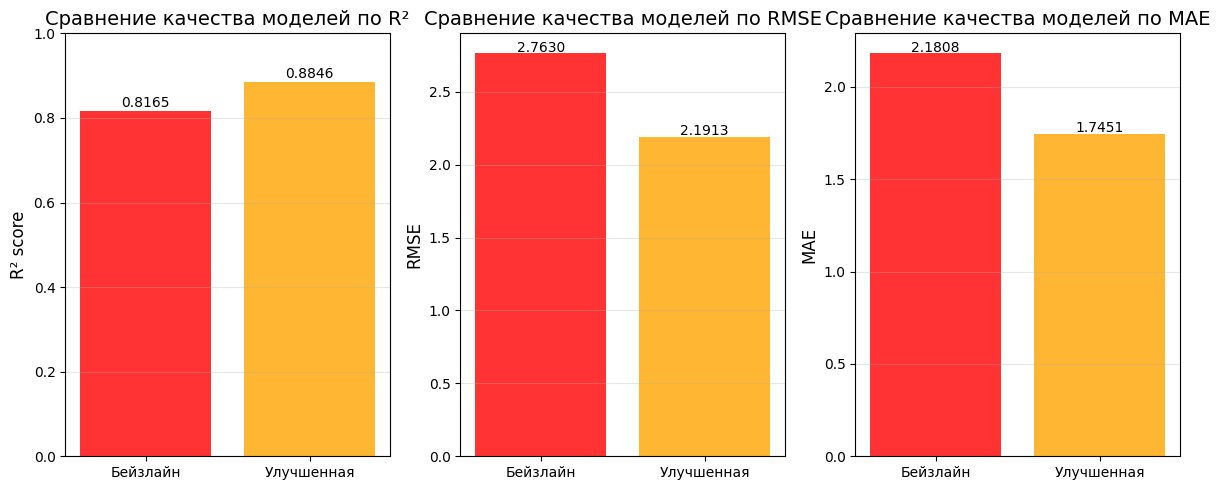

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
models = ['Бейзлайн',  'Улучшенная']
r2_values = [baseline_metrics['r2'],  improved_metrics['r2']]
colors = ['red', 'orange', 'green']

bars = plt.bar(models, r2_values, color=colors, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Сравнение качества моделей по R²', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 3, 2)
rmse_values = [baseline_metrics['rmse'],  improved_metrics['rmse']]
bars = plt.bar(models, rmse_values, color=colors, alpha=0.8)
plt.ylabel('RMSE', fontsize=12)
plt.title('Сравнение качества моделей по RMSE', fontsize=14)
for bar, value in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 3, 3)
mae_values = [baseline_metrics['mae'],  improved_metrics['mae']]
bars = plt.bar(models, mae_values, color=colors, alpha=0.8)
plt.ylabel('MAE', fontsize=12)
plt.title('Сравнение качества моделей по MAE', fontsize=14)
for bar, value in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Подбор гиперпараметров для модели Decision Tree оказался очень эффективным. Все метрики показывают существенное улучшение по сравнению с базовой моделью и всеми предыдущими методами предобработки данных.

### 4.	Имплементация алгоритма машинного обучения

In [ ]:
#Имплементация алгоритма
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  #индекс признака для разделения
        self.threshold = threshold          #пороговое значение
        self.left = left                    #левое поддерево
        self.right = right                  #правое поддерево
        self.value = value                  #значение для листового узла

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
    #Вычисляет среднеквадратичную ошибку
    def _mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y)) ** 2)
    #Находит лучший признак и порог для разделения
    def _best_split(self, X, y):
        m, n = X.shape
        if m <= self.min_samples_split:
            return None, None

        best_mse = float('inf')
        best_feature, best_threshold = None, None

        for feature_index in range(n):
            feature_values = X[:, feature_index]
            unique_values = np.unique(feature_values)

            for threshold in unique_values:
                left_indices = feature_values <= threshold
                right_indices = feature_values > threshold

                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue

                left_mse = self._mse(y[left_indices])
                right_mse = self._mse(y[right_indices])
                total_mse = (np.sum(left_indices) * left_mse + np.sum(right_indices) * right_mse) / m

                if total_mse < best_mse:
                    best_mse = total_mse
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold

    def _build_tree(self, X, y, depth=0):
        n_samples = len(y)

        #Условия остановки
        if (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split or \
           n_samples == 0:
            return Node(value=np.mean(y))

        #Находим лучшее разделение
        feature_index, threshold = self._best_split(X, y)

        #Создаем лист
        if feature_index is None:
            return Node(value=np.mean(y))

        #Разделяем данные
        left_indices = X[:, feature_index] <= threshold
        right_indices = X[:, feature_index] > threshold

        #Создание левого и правого поддеревьев
        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature_index=feature_index,
                   threshold=threshold,
                   left=left_subtree,
                   right=right_subtree)

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.root = self._build_tree(X, y)

    def _predict_sample(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature_index] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)

    def predict(self, X):
        X = np.array(X)
        predictions = [self._predict_sample(x, self.root) for x in X]
        return np.array(predictions)

In [ ]:
#Обучение и предсказание кастомной модели
custom_tree = CustomDecisionTreeRegressor()
custom_tree.fit(X_train, y_train)

y_pred_custom = custom_tree.predict(X_test)

In [ ]:
#Метрики
custom_metrics = evaluate_model(y_test, y_pred_custom, "Custom Decision Tree")


Custom Decision Tree:
MAE: 2.1884
RMSE: 2.7743
R² Score: 0.8150


In [ ]:
print("\nРазница в метриках (моя реализация - sklearn):")
print(f"MAE: {mean_absolute_error(y_test, y_pred_custom) - mean_absolute_error(y_test, y_pred):.6f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_custom)) - np.sqrt(mean_squared_error(y_test, y_pred)):.6f}")
print(f"R²: {r2_score(y_test, y_pred_custom) - r2_score(y_test, y_pred):.6f}")


Разница в метриках (моя реализация - sklearn):
MAE: 0.007598
RMSE: 0.011208
R²: -0.001492


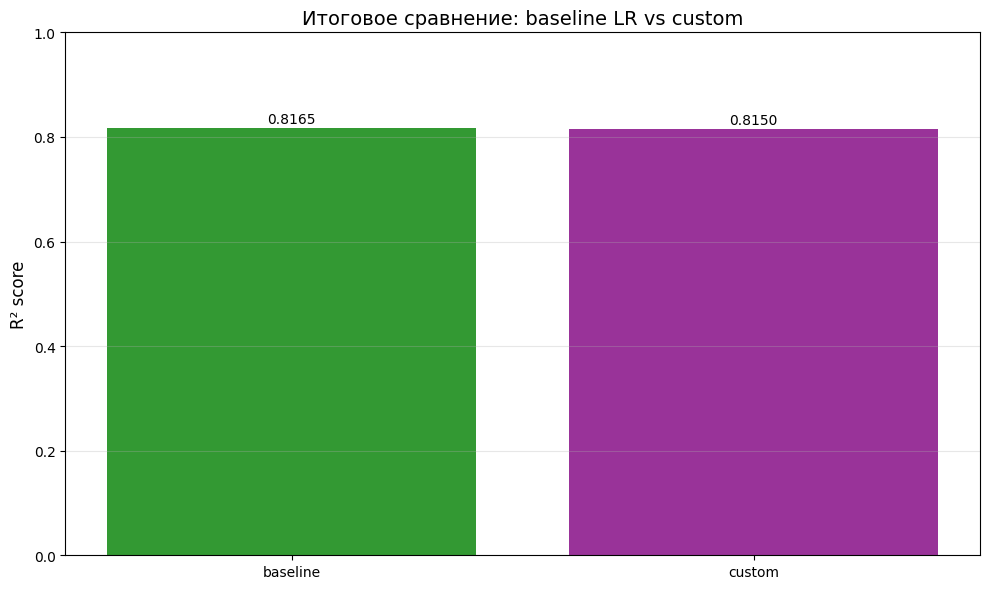

In [ ]:
#Визуализация итогового сравнения
plt.figure(figsize=(10, 6))
models_final = ['baseline', 'custom']
r2_final = [baseline_metrics['r2'], custom_metrics['r2']]
colors_final = ['green', 'purple']

bars = plt.bar(models_final, r2_final, color=colors_final, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Итоговое сравнение: baseline LR vs custom', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Реализация успешно соответствует эталонной реализации sklearn, что подтверждает её корректность

In [ ]:
#Используем все улучшения на кастомной модели
custom_model_improved = CustomDecisionTreeRegressor(max_depth = 10 , min_samples_split = 20)
custom_model_improved.fit(X_train, y_train)

y_pred_custom_improved = custom_model_improved.predict(X_test)
custom_improved_metrics = evaluate_model(y_test, y_pred_custom_improved, "Custom Improved")


Custom Improved:
MAE: 1.7517
RMSE: 2.2075
R² Score: 0.8828


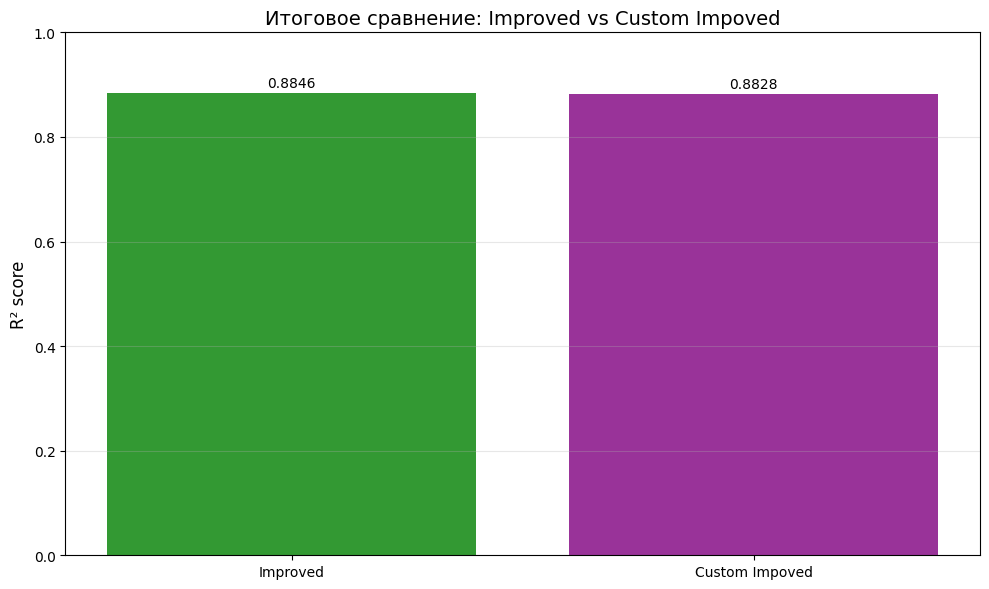

In [ ]:
#Визуализация итогового сравнения
plt.figure(figsize=(10, 6))
models_final = ['Improved', 'Custom Impoved']
r2_final = [improved_metrics['r2'], custom_improved_metrics['r2']]
colors_final = ['green', 'purple']

bars = plt.bar(models_final, r2_final, color=colors_final, alpha=0.8)
plt.ylabel('R² score', fontsize=12)
plt.title('Итоговое сравнение: Improved vs Custom Impoved', fontsize=14)
plt.ylim(0, 1)
for bar, value in zip(bars, r2_final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.4f}', ha='center', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Кастомная реализация Decision Tree демонстрирует практически идентичное качество по сравнению с sklearn-версией, с минимальными отличиями в метриках

In [ ]:
final_comparison = pd.DataFrame({
    'Baseline': baseline_metrics,
    'Improved': improved_metrics,
    'Custom': custom_metrics,
    'Improved Custom': custom_improved_metrics
}).T

print("Сравнение метрик всех версий:")
print(final_comparison)

Сравнение метрик всех версий:
                      mae      rmse        r2
Baseline         2.180809  2.763050  0.816454
Improved         1.745140  2.191281  0.884558
Custom           2.188407  2.774258  0.814961
Improved Custom  1.751721  2.207471  0.882846


Улучшенные версии моделей демонстрируют существенно лучшие результаты по всем метрикам по сравнению с базовыми версиями. Модель с улучшенным бейзлайном показывает наилучший результат (R²=0.885), что означает способность объяснять около 88.5% дисперсии цены пиццы.